In [190]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dolphins_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 

In [191]:
# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(2)
cov_matrix = np.array([[1.0, 0], [0, 2.0]]) 
num_samples = 62 

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [192]:
# Adding stopping criteria
prev_grad = 200 
grad = 0
k = 0
n = 100000
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum

while abs(prev_grad - grad) > 0.1: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            grad_sum[k] += Gradient_function(i,j,Y,points)**2
            points[i][j] += LR(k)*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function
    print(k)
    k += 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73


In [193]:
LR(k)

0.04771139155210344

In [194]:
np.sqrt(grad_sum[k-1])

1.4942630508326131

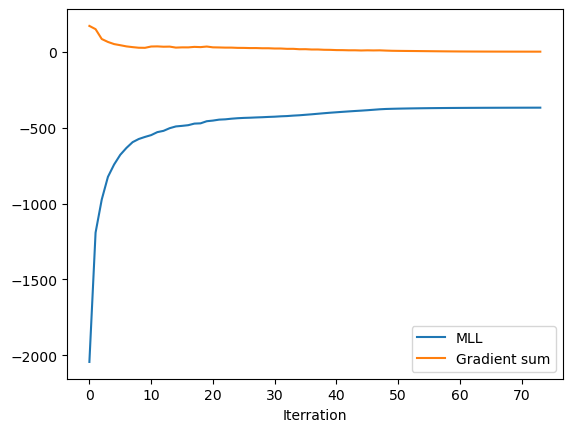

In [195]:
plt.plot(MLL[0:k],label='MLL')
plt.plot(np.sqrt(grad_sum[0:k]), label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

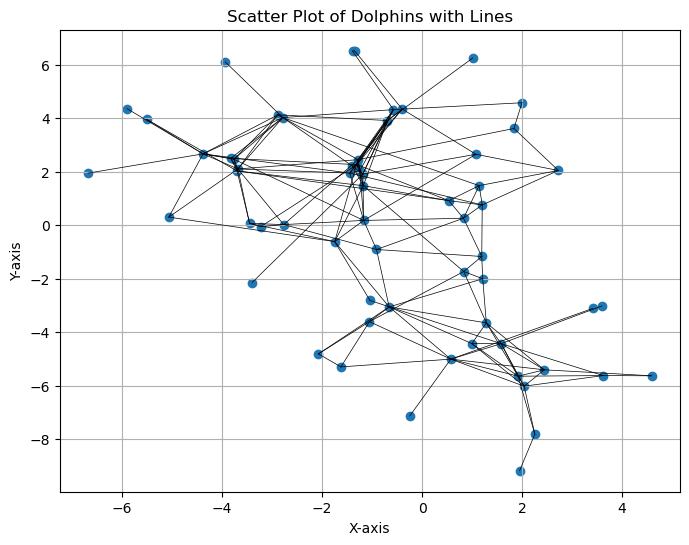

In [196]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Dolphins with Lines')
plt.grid(True)
plt.show()